In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, Input, layers
from tensorflow.keras.models import Sequential

In [2]:
(train_data, train_labels), (test_data, test_labels) = datasets.imdb.load_data(num_words=10000)

In [3]:
#decoding the tokenized review back to english
word_index = datasets.imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [4]:
def vectorize_sequences(sequences, dimension=10000): 
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
X_train.shape

(25000, 10000)

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
y_train[0]

np.float32(1.0)

In [15]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),

    layers.Dense(1, activation='sigmoid')
    
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │         640,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 642,177 (2.45 MB)

 Trainable params: 642,177 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(X_train, y_train, epochs=10, batch_size=512, validation_split=0.2)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7265 - loss: 0.5481 - val_accuracy: 0.8858 - val_loss: 0.2895
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9272 - loss: 0.2090 - val_accuracy: 0.8864 - val_loss: 0.2947
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9500 - loss: 0.1490 - val_accuracy: 0.8890 - val_loss: 0.2998
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9674 - loss: 0.1081 - val_accuracy: 0.8844 - val_loss: 0.3339
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9809 - loss: 0.0727 - val_accuracy: 0.8776 - val_loss: 0.3852
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9872 - loss: 0.0542 - val_accuracy: 0.8722 - val_loss: 0.4434
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9930 - loss: 0.0365 - val_accuracy: 0.8714 - val_loss: 0.4929
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9980 - loss: 0.0194 - val_accuracy: 0.8720 - v

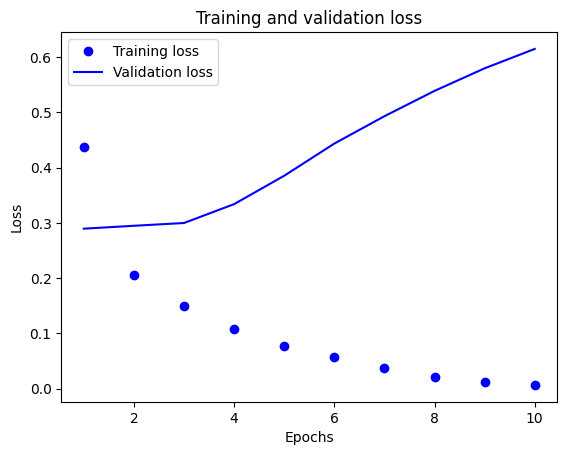

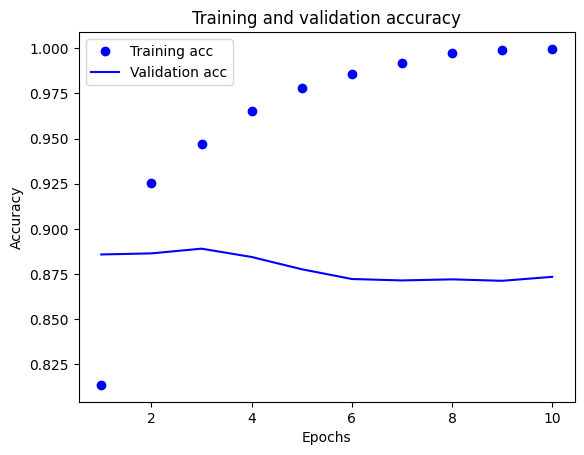

In [18]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [19]:
results = model.evaluate(X_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8584 - loss: 0.6592


In [20]:
results

[0.6643666625022888, 0.8575599789619446]

In [21]:
predictions = model.predict(X_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [22]:
print(predictions)

[[0.24992152]
 [0.99999994]
 [0.07119282]
 ...
 [0.04791252]
 [0.00253857]
 [0.29454768]]


In [24]:
predictions[1][0]

np.float32(0.99999994)

In [25]:
y_test[1]

np.float32(1.0)